In [21]:
#Akshay Maheshwari, PSET3

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Hydrophobic = 1, hydrophilic = 2, water = 0
def potential(A,A_er,A_ec,simple=False):
    E=0
    r_len = len(A)
    c_len = len(A[0])
    for r in range(r_len):
        for c in range(c_len):
            if(r<r_len-1):
                E+=pair_potential(A[r][c],A[r+1][c],A_ec[c][r],simple)
            if(c<c_len-1):
                E+=pair_potential(A[r][c],A[r][c+1],A_er[c][r],simple)
            if(r>1 and A[r-1][c]==0 and r<r_len-1):
                E+=pair_potential(A[r][c],A[r-1][c],A_ec[c][r],simple)
            if(c>1 and A[r][c-1]==0 and c<c_len-1):
                E+=pair_potential(A[r][c],A[r][c-1],A_er[c][r],simple)

    return E
def pair_potential(Aij,Aij_1,A_e,simple=False):
    E=0
    if(Aij == 1 and Aij_1 == 1 and A_e==0):
        if(not simple):
            E-=2
        if(simple):
            E-=1
    if(Aij == 1 and Aij_1 == 0 ):
        if(not simple):
            E+=1      
    return E

def runStruct(A,A_er,A_ec):
    E_traj = []
    E_curr = 0.5*potential(A,A_er,A_ec)
    E_traj.append(E_curr)
    seq_traj = []
    for iter in range(100000):
        i=np.random.randint(0,len(A))
        j=np.random.randint(0,len(A[0]))
        while(A[i][j] != 1 and A[i][j]!=2):
            i=np.random.randint(0,len(A))
            j=np.random.randint(0,len(A[0]))
        A_curr = A.copy()
        if(A[i][j]==1):
            A_curr[i][j]=2
        else:
            A_curr[i][j]=1

        E_sample = 2*potential(A_curr,A_er,A_ec)
        del_E = E_sample-E_curr
        if(del_E<=0 or np.random.uniform(0,1)<np.exp(-del_E)):
            E_traj.append(E_sample)
            E_curr = E_sample
            A=A_curr.copy()
            seq = [i for Ai in A for i in Ai]
            seq = list(filter(lambda a: a != 0, seq))
            seq_traj.append(seq)
    return E_traj,seq_traj

def bruteForce(A,A_er,A_ec,simple=False):
    seq = [i for Ai in A for i in Ai]
    seq = list(filter(lambda a: a != 0, seq))
    E_traj = []
    E_curr = 0.5*potential(A,A_er,A_ec,simple)
    E_traj.append(E_curr)
    seq_traj = []
    for iter in range(2**len(seq)):
        i=np.random.randint(0,len(A))
        j=np.random.randint(0,len(A[0]))
        while(A[i][j] != 1 and A[i][j]!=2):
            i=np.random.randint(0,len(A))
            j=np.random.randint(0,len(A[0]))
        A_curr = A.copy()
        if(A[i][j]==1):
            A_curr[i][j]=2
        else:
            A_curr[i][j]=1
        E_sample = 2*potential(A_curr,A_er,A_ec,simple)
        del_E = E_sample-E_curr
        E_traj.append(E_sample)
        E_curr = E_sample
        A=A_curr.copy()
        seq = [i for Ai in A for i in Ai]
        seq = list(filter(lambda a: a != 0, seq))
        seq_traj.append(seq)
    return E_traj,seq_traj

def rejectAll(A,A_er,A_ec):
    E_traj = []
    E_curr = 0.5*potential(A,A_er,A_ec)
    E_traj.append(E_curr)
    seq_traj = []
    for iter in range(100000):
        i=np.random.randint(0,len(A))
        j=np.random.randint(0,len(A[0]))
        while(A[i][j] != 1 and A[i][j]!=2):
            i=np.random.randint(0,len(A))
            j=np.random.randint(0,len(A[0]))
        A_curr = A.copy()
        if(A[i][j]==1):
            A_curr[i][j]=2
        else:
            A_curr[i][j]=1

        E_sample = 2*potential(A_curr,A_er,A_ec)
        del_E = E_sample-E_curr
        if(del_E<=0):
            E_traj.append(E_sample)
            E_curr = E_sample
            A=A_curr.copy()
            seq = [i for Ai in A for i in Ai]
            seq = list(filter(lambda a: a != 0, seq))
            seq_traj.append(seq)
    return E_traj,seq_traj


Structure 1
Minimum found energy:  -26 kT


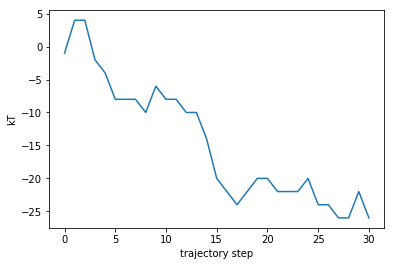

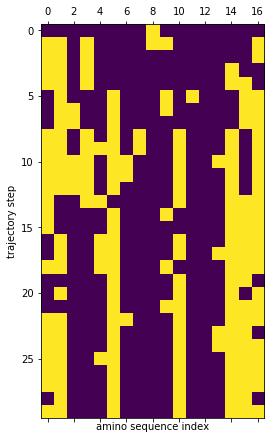

In [90]:
print('Structure 1')
A = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,1,0,0],[0,1,1,1,1,0,0],[0,1,1,1,1,1,0],[0,0,1,1,0,0,0],[0,0,0,0,0,0,0]]
A_er = [[0,0,0,0,0,0,0],[0,1,0,1,1,0,0],[0,0,0,0,0,1,0],[0,0,1,0,0,0,0],[0,0,0,0,1,0,0],[0,0,0,0,0,0,0]]
A_ec = [[0,0,0,0,0,0],[0,1,0,1,0,0],[0,1,1,0,1,0],[0,0,1,1,1,0],[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
E_traj,seq_traj = runStruct(A,A_er,A_ec)
plt.plot(E_traj)
plt.xlabel('trajectory step')
plt.ylabel('kT')

plt.matshow(seq_traj)
plt.ylabel('trajectory step')

plt.xlabel('amino sequence index')

print("Minimum found energy: ", min(E_traj), "kT")

Structure 2
Minimum found energy:  -16 kT


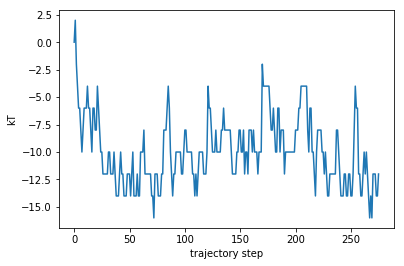

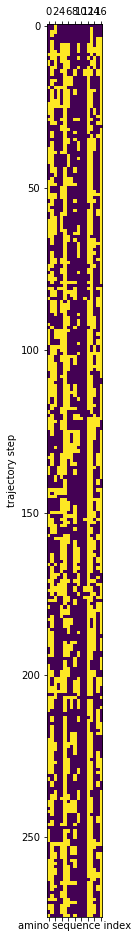

In [91]:
print('Structure 2')
A = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,1,0,0],[0,0,1,1,1,0,0],[0,0,1,1,1,1,0],[0,0,1,1,1,1,0],[0,0,0,0,0,0,0]]
A_er = [[0,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,0,0,0,1,0],[0,0,1,0,0,1,0],[0,0,0,0,1,1,0],[0,0,0,0,0,0,0]]
A_ec = [[0,0,0,0,0,0],[0,1,0,0,0,0],[0,1,1,1,1,0],[0,0,1,1,0,0],[0,0,1,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,0]]
E_traj,seq_traj = runStruct(A,A_er,A_ec)
plt.plot(E_traj)
plt.xlabel('trajectory step')
plt.ylabel('kT')

plt.matshow(seq_traj)
plt.ylabel('trajectory step')
plt.xlabel('amino sequence index')


print("Minimum found energy: ", min(E_traj), "kT")


Structure 3
Minimum found energy:  -16 kT


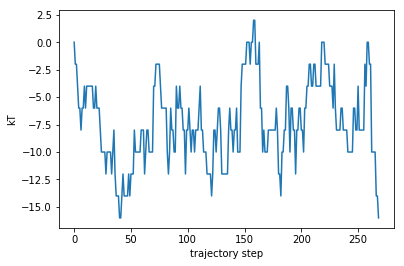

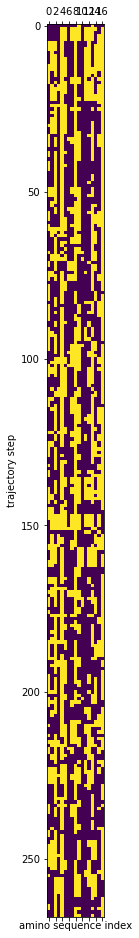

In [92]:
print('Structure 3')
A = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,0,0,0],[0,0,1,1,1,1,0],[0,0,1,1,1,1,0],[0,0,1,1,1,1,0],[0,0,0,0,0,0,0]]
A_er = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,0,1,1,1,1,0],[0,0,0,0,1,1,0],[0,0,0,1,0,1,0],[0,0,0,0,0,0,0]]
A_ec = [[0,0,0,0,0,0],[0,1,0,0,0,0],[0,0,0,1,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,1,1,0],[0,0,0,0,0,0]]
E_traj,seq_traj = runStruct(A,A_er,A_ec)
plt.plot(E_traj)
plt.xlabel('trajectory step')
plt.ylabel('kT')

plt.matshow(seq_traj)
plt.ylabel('trajectory step')
plt.xlabel('amino sequence index')

print("Minimum found energy: ", min(E_traj), "kT")


# B
Yes, the simulation reaches the lowest energy sequence for each structure.

In [93]:
print('Structure 1')
A = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,1,0,0],[0,1,1,1,1,0,0],[0,1,1,1,1,1,0],[0,0,1,1,0,0,0],[0,0,0,0,0,0,0]]
A_er = [[0,0,0,0,0,0,0],[0,1,0,1,1,0,0],[0,0,0,0,0,1,0],[0,0,1,0,0,0,0],[0,0,0,0,1,0,0],[0,0,0,0,0,0,0]]
A_ec = [[0,0,0,0,0,0],[0,1,0,1,0,0],[0,1,1,0,1,0],[0,0,1,1,1,0],[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
E_traj,seq_traj = bruteForce(A,A_er,A_ec)

print("Minimum brute force found energy: ", min(E_traj), "kT")
print("Corresponds to sequence: ", seq_traj[np.argmin(E_traj)])


Structure 1
Minimum brute force found energy:  -26 kT
Corresponds to sequence:  [1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2]


In [94]:
print('Structure 2')
A = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,1,0,0],[0,0,1,1,1,0,0],[0,0,1,1,1,1,0],[0,0,1,1,1,1,0],[0,0,0,0,0,0,0]]
A_er = [[0,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,0,0,0,1,0],[0,0,1,0,0,1,0],[0,0,0,0,1,1,0],[0,0,0,0,0,0,0]]
A_ec = [[0,0,0,0,0,0],[0,1,0,0,0,0],[0,1,1,1,1,0],[0,0,1,1,0,0],[0,0,1,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,0]]
E_traj,seq_traj = bruteForce(A,A_er,A_ec)

print("Minimum brute force found energy: ", min(E_traj),"kT")
print("Corresponds to sequence: ", seq_traj[np.argmin(E_traj)])

Structure 2
Minimum brute force found energy:  -18 kT
Corresponds to sequence:  [1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2]


In [95]:
print('Structure 3')
A = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,0,0,0],[0,0,1,1,1,1,0],[0,0,1,1,1,1,0],[0,0,1,1,1,1,0],[0,0,0,0,0,0,0]]
A_er = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,0,1,1,1,1,0],[0,0,0,0,1,1,0],[0,0,0,1,0,1,0],[0,0,0,0,0,0,0]]
A_ec = [[0,0,0,0,0,0],[0,1,0,0,0,0],[0,0,0,1,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,1,1,0],[0,0,0,0,0,0]]
E_traj,seq_traj = bruteForce(A,A_er,A_ec)

print("Minimum brute force found energy: ", min(E_traj),"kT")
print("Corresponds to sequence: ", seq_traj[np.argmin(E_traj)])

Structure 3
Minimum brute force found energy:  -16 kT
Corresponds to sequence:  [2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2]


# C. 
Yes,the simulation reaches the lowest energy sequence if we simply reject all attempted moves that lead to an increase in energy, i.e. simple gradient descent. We definitely do not expect this to be the case with a realistic protein structure. Here we have a simple convex space in which gradient descent can reach minimum energy; with a realistic protein we'd expect the free energy landscape to be nonconvex and to get stuck at local minima.


Structure 1
Minimum found energy:  -26 kT


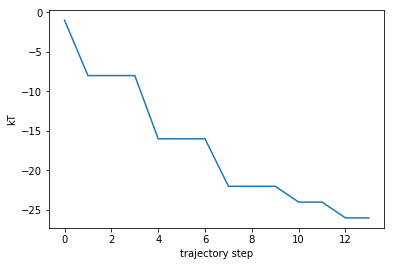

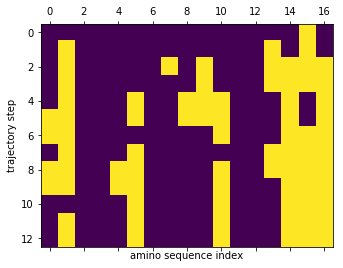

In [96]:
print('Structure 1')
A = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,1,0,0],[0,1,1,1,1,0,0],[0,1,1,1,1,1,0],[0,0,1,1,0,0,0],[0,0,0,0,0,0,0]]
A_er = [[0,0,0,0,0,0,0],[0,1,0,1,1,0,0],[0,0,0,0,0,1,0],[0,0,1,0,0,0,0],[0,0,0,0,1,0,0],[0,0,0,0,0,0,0]]
A_ec = [[0,0,0,0,0,0],[0,1,0,1,0,0],[0,1,1,0,1,0],[0,0,1,1,1,0],[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
E_traj,seq_traj = rejectAll(A,A_er,A_ec)
plt.plot(E_traj)
plt.xlabel('trajectory step')
plt.ylabel('kT')

plt.matshow(seq_traj)
plt.ylabel('trajectory step')
plt.xlabel('amino sequence index')

print("Minimum found energy: ", min(E_traj),"kT")


Structure 2
Minimum found energy:  -18 kT


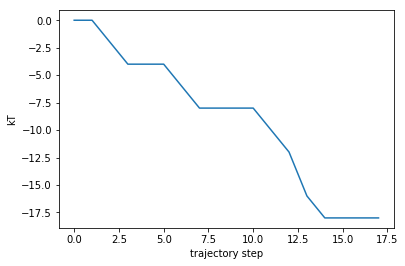

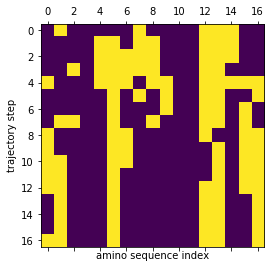

In [97]:
print('Structure 2')
A = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,1,0,0],[0,0,1,1,1,0,0],[0,0,1,1,1,1,0],[0,0,1,1,1,1,0],[0,0,0,0,0,0,0]]
A_er = [[0,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,0,0,0,1,0],[0,0,1,0,0,1,0],[0,0,0,0,1,1,0],[0,0,0,0,0,0,0]]
A_ec = [[0,0,0,0,0,0],[0,1,0,0,0,0],[0,1,1,1,1,0],[0,0,1,1,0,0],[0,0,1,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,0]]
E_traj,seq_traj = rejectAll(A,A_er,A_ec)
plt.plot(E_traj)
plt.xlabel('trajectory step')
plt.ylabel('kT')

plt.matshow(seq_traj)
plt.ylabel('trajectory step')
plt.xlabel('amino sequence index')
print("Minimum found energy: ", min(E_traj),"kT")

Structure 3
Minimum found energy:  -16 kT


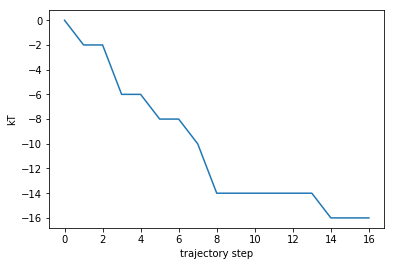

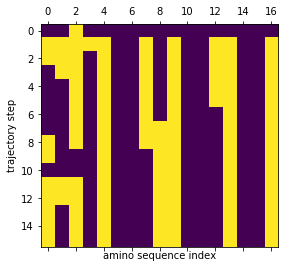

In [98]:
print('Structure 3')
A = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,0,0,0],[0,0,1,1,1,1,0],[0,0,1,1,1,1,0],[0,0,1,1,1,1,0],[0,0,0,0,0,0,0]]
A_er = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,0,1,1,1,1,0],[0,0,0,0,1,1,0],[0,0,0,1,0,1,0],[0,0,0,0,0,0,0]]
A_ec = [[0,0,0,0,0,0],[0,1,0,0,0,0],[0,0,0,1,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,1,1,0],[0,0,0,0,0,0]]
E_traj,seq_traj = rejectAll(A,A_er,A_ec)
plt.plot(E_traj)
plt.xlabel('trajectory step')
plt.ylabel('kT')

plt.matshow(seq_traj)
plt.ylabel('trajectory step')
plt.xlabel('amino sequence index')
print("Minimum found energy: ", min(E_traj),"kT")

# D
No, it is not guaranteed that the given structure is the lowest energy sequence for the designed structure. There could be many other structures that achieve a lower energy state for the given sequence. In particular, we can see that lower energy folding states exist, and thus that the designed sequence does not fold uniquely to the target structure:
Bonus:

For structure 1: [1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2], here we see that shifting the hydrophobic residues (1 corresponds to hydrophobic) at positions 3 and 4 towards the inner core of the protein will lead to hydrophobic interactions.

For structure 2: [1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1], we see that moving (2,1) to (2,2) and pulling the chain along, while also removing the kink at (4,4), creating a sheet like structure, will lead to even greater hydrophobic interactions and thus to a structure with higher energy

For structure 3: [1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1], we can rotate the first 4 residues past the 5 residue to obtain a lower energy structure.

# E
These sequences will fold to the target structures spontaneously, but not neccessarily uniquely, as there are immediately other structures that would have the same or higher energy. This is immediately apparent through example: in structure 3, the residues at (1,1) and (1,2) can be moved to (3,1) and (3,2) respectively and this structure would have greater hydrophobic interactions. More broadly, since we are only capturing hydrophobic interaction energy instead of accounting for hydrophobic exposure to solvent.

Bonus:
No, the designed sequences do not fold uniquely to the target structures, as discussed above.

In [100]:
print('Structure 1')
A = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,1,0,0],[0,1,1,1,1,0,0],[0,1,1,1,1,1,0],[0,0,1,1,0,0,0],[0,0,0,0,0,0,0]]
A_er = [[0,0,0,0,0,0,0],[0,1,0,1,1,0,0],[0,0,0,0,0,1,0],[0,0,1,0,0,0,0],[0,0,0,0,1,0,0],[0,0,0,0,0,0,0]]
A_ec = [[0,0,0,0,0,0],[0,1,0,1,0,0],[0,1,1,0,1,0],[0,0,1,1,1,0],[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
E_traj,seq_traj = bruteForce(A,A_er,A_ec,simple=True)

print("Minimum brute force found energy (with simple potential): ", min(E_traj), "kT")
print("Corresponds to sequence: ", seq_traj[np.argmin(E_traj)])

print('Structure 2')
A = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,1,0,0],[0,0,1,1,1,0,0],[0,0,1,1,1,1,0],[0,0,1,1,1,1,0],[0,0,0,0,0,0,0]]
A_er = [[0,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,0,0,0,1,0],[0,0,1,0,0,1,0],[0,0,0,0,1,1,0],[0,0,0,0,0,0,0]]
A_ec = [[0,0,0,0,0,0],[0,1,0,0,0,0],[0,1,1,1,1,0],[0,0,1,1,0,0],[0,0,1,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,0]]
E_traj,seq_traj = bruteForce(A,A_er,A_ec,simple=True)

print("Minimum brute force found energy (with simple potential): ", min(E_traj), "kT")
print("Corresponds to sequence: ", seq_traj[np.argmin(E_traj)])

print('Structure 3')
A = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,0,0,0],[0,0,1,1,1,1,0],[0,0,1,1,1,1,0],[0,0,1,1,1,1,0],[0,0,0,0,0,0,0]]
A_er = [[0,0,0,0,0,0,0],[0,1,1,0,0,0,0],[0,0,1,1,1,1,0],[0,0,0,0,1,1,0],[0,0,0,1,0,1,0],[0,0,0,0,0,0,0]]
A_ec = [[0,0,0,0,0,0],[0,1,0,0,0,0],[0,0,0,1,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,1,1,0],[0,0,0,0,0,0]]
E_traj,seq_traj = bruteForce(A,A_er,A_ec,simple=True)

print("Minimum brute force found energy (with simple potential): ", min(E_traj), "kT")
print("Corresponds to sequence: ", seq_traj[np.argmin(E_traj)])


Structure 1
Minimum brute force found energy (with simple potential):  -16 kT
Corresponds to sequence:  [2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Structure 2
Minimum brute force found energy (with simple potential):  -16 kT
Corresponds to sequence:  [1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
Structure 3
Minimum brute force found energy (with simple potential):  -16 kT
Corresponds to sequence:  [2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
